<h1>Titanic Dataset</h1>
The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

What is the binary classification problem?

Binary classification is the simplest kind of machine learning problem. The goal of binary classification is to categorise data
points into one of two buckets: 0 or 1, true or false, to survive or not to survive, blue or no blue eyes, etc.A

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# load the data from csv file to pandas Dataframe
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

<h2>About Features </h2>
sibsp --- > Number of Siblings/Spouses Aboard<br>
parch---> Number of Parents/Children Aboard<br>
Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton<br>
p-class --- >ticket class 1st = Upper 2nd = Middle 3rd = Lower

In [4]:
#Shape of Our Dataset 
df.shape

(891, 12)

In [5]:
#Information About Our Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Overall Statistics
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<h1>Handling Missing Value</h1>
<h2>
Data imputation</h2>
process of replacig missing data with substained value<br>
<h2>Data manipulation</h2>
process of changing or altering data in order to make it more readable and organized.


In [7]:
#Null values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
missing_value_percent = df.isnull().sum() * 100 /len(df)
missing_value_percent

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
#dropping cabin column 
df.drop('Cabin', axis = 1,inplace = True)

In [10]:
#filling the null values with appropriate value using aggregrate function such as mean , meadian and mode
print(df['Age'].median())
print(df['Embarked'].mode()[0])

28.0
S


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(str(df['Embarked'].mode()[0]))

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h2>Data Filtering </h2>
Data filtering is the process of choosing a smaller part of your data set and using that subset for viewing or analysis.

In [13]:
#traveller
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
#age boxplot

In [15]:
# Number of passanger survived
sum(df['Survived'] == 1)

342

In [16]:
# Number of people survived 
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:>

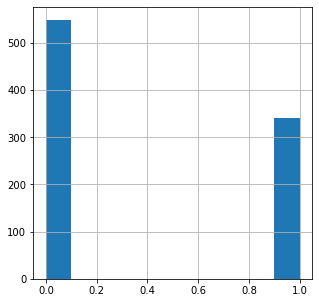

In [17]:
plt.figure(figsize=(5,5))
df['Survived'].hist()

<AxesSubplot:xlabel='Sex', ylabel='count'>

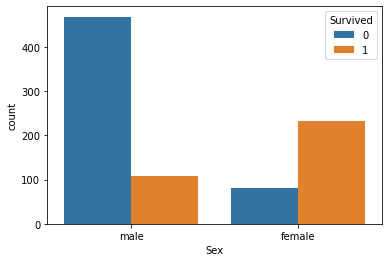

In [18]:
sns.countplot(x = 'Sex',hue ='Survived',data=df)

In [19]:
#find number of people in different ticket class
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

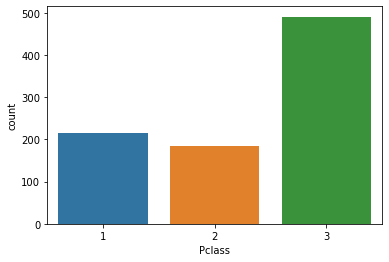

In [21]:
# count plot for 'p class' column
sns.countplot(x='Pclass', data = df)

<h2> Categorical data encoding</h2>


In [22]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [23]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
# map 
df['Gender']= df['Sex'].map({'male':1,'female':0})
df.drop('Sex',axis=1,inplace= True)
df.head()
'''
#replace
df.replace('Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2})
'''

"\n#replace\ndf.replace('Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2})\n"

In [25]:
df1= pd.get_dummies(df,columns=['Embarked'],drop_first= True,)
df1.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Gender,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


####  Seperating Feature and Target

In [27]:
x = df1.drop(['Ticket','Name','PassengerId'],axis=1)
y = df1['Survived']

In [28]:
x.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Splitting the data into Training and Test data

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x.shape,X_train.shape,X_test.shape)

(891, 9) (712, 9) (179, 9)


#### Model Selection

In [33]:
model = LogisticRegression()

#### Training the Logistic Regression model with Training data

In [34]:
model.fit(X_train,Y_train)

C:\Users\sunil\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Model Evaluation 

In [44]:
# Accuracy on Training data
X_train_prediction = model.predict(X_train)

In [45]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [52]:
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f'accuracy of training data {training_data_accuracy}')

accuracy of training data 1.0


In [43]:
X_train_prediction[23] 

0

In [47]:
# Accuracy on Test data
X_test_prediction = model.predict(X_test)

In [48]:
print(X_test_prediction)

[1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0
 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1
 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0]


In [50]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print(f'accuracy of test data {test_data_accuracy}')

accuracy of test data 1.0


In [53]:
model.score(X_test,Y_test)

1.0